In [ ]:

import numpy as np
from PIL import Image
from photutils.detection import DAOStarFinder
from astropy.stats import mad_std
import matplotlib.pyplot as plt

In [10]:
image = Image.open('Diegotheexplorer.png').convert('L')  # Convert to grayscale
image_array = np.array(image)  # Convert to a numpy array

In [11]:
image_array = image_array.astype(float)  # Convert to float
image_array /= image_array.max()  # Normalize to the range [0, 1]

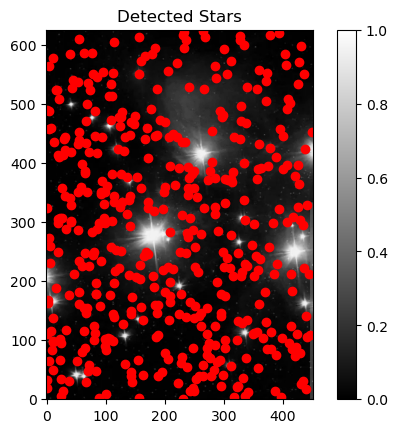

 id     xcentroid      ...        flux                mag         
--- ------------------ ... ------------------ --------------------
  1 231.02510688891925 ...  2.003937712694443  -0.7547105461647943
  2  88.21165213434092 ...  2.805627610995469  -1.1200750672812478
  3   156.918112015073 ... 1.9740058961593978  -0.7383711138250106
  4 317.11301576845574 ...  2.754262452322569  -1.1000133040040203
  5   397.147629881775 ... 1.7270194976501936   -0.593243101698163
  6 24.646225266463663 ... 2.7603897890700644  -1.1024260306065226
  7 336.46859342027994 ... 1.7395486647512677  -0.6010914571518293
  8 100.39514243282044 ...  1.941996122682938  -0.7206208961916984
  9  341.7880039091578 ... 1.4684444943103676 -0.41714383821224454
 10 243.00997821820098 ... 2.1915916495195407   -0.851899092503854
...                ... ...                ...                  ...
446 235.74519187322258 ... 2.6578412855733986  -1.0613226081291882
447  327.0604133965828 ...  2.387874790646883  -0.945028876540

In [ ]:
# MAD = Median Absolute Deviation; a robust measure of noise
sigma = mad_std(image_array)

# Step 4: Use DAOStarFinder to detect stars
daofind = DAOStarFinder(fwhm=3, threshold=5 * sigma)
sources = daofind(image_array)

# Step 5: Visualize detected stars
# Plot the image
plt.imshow(image_array, cmap='gray', origin='lower')
plt.colorbar()

# Overlay detected stars
if sources is not None:
    for star in sources:
        plt.plot(star['xcentroid'], star['ycentroid'], 'ro')  # Red circles for detected stars

plt.title('Detected Stars')
plt.show()

# Step 6: Print detected stars
if sources is not None:
    print(sources)
else:
    print("No stars were detected.")
